# adult (p21) cortex layer density

## setup

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

import glob
import os


### read data from files

In [8]:
csv_files = glob.glob('supplementary/cortex_density/*.csv')

file_names = [os.path.basename(path) for path in csv_files]

dfs = [pd.read_csv(file) for file in csv_files]

for file, df in zip(file_names, dfs):
    df['source'] = file

cortex_df = pd.concat(dfs, ignore_index=True)

## showing data

### based on distance

Text(0.5, 1.0, 'cell distribution across dist')

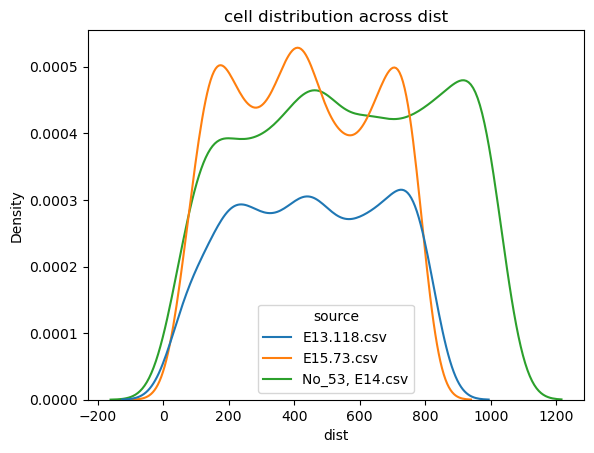

In [9]:
sns.kdeplot(data=cortex_df, x='dist', hue='source')
plt.title('cell distribution across dist')

### based on layer

<Axes: xlabel='layer', ylabel='count'>

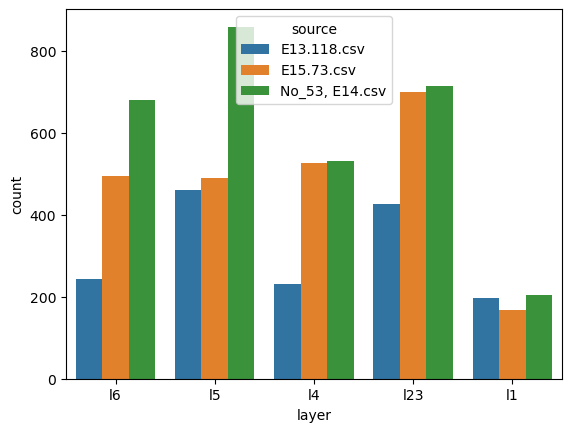

In [10]:
sns.countplot(data=cortex_df, x='layer', hue='source')

### percentage by layer

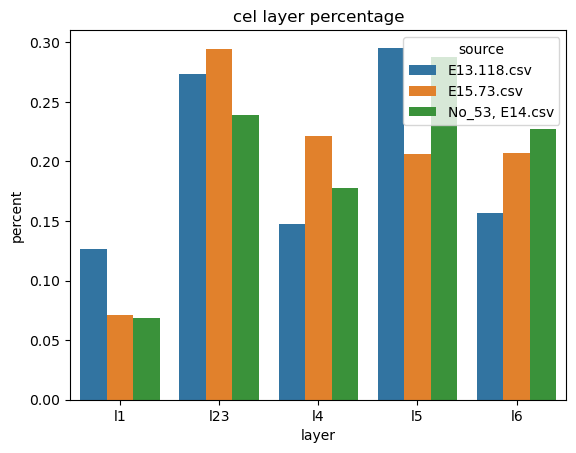

In [11]:
counts = cortex_df.groupby(['source', 'layer']).size().reset_index(name='count')

counts['percent'] = counts.groupby('source')['count'].transform(lambda x: x / x.sum())

sns.barplot(data=counts, x='layer', y='percent', hue='source')
plt.title('cel layer percentage')
plt.show()


## final results

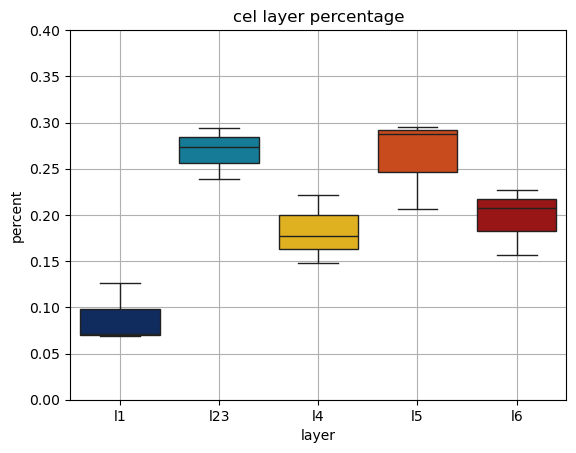

In [12]:
layer_colors = ['#ae0000', '#e33e00', '#ffc000', '#0088ab', '#03286b']

layer_labels = ['l6', 'l5', 'l4', 'l23', 'l1']

sns.boxplot(data=counts, x='layer', y='percent', hue ='layer', palette=layer_colors[::-1])
plt.title('cel layer percentage')
plt.ylim([0,0.4])
plt.grid()
plt.savefig('results/adult_layer_percent.pdf')

### by different pictures

(array([0, 1, 2]),
 [Text(0, 0, 'E13.118.csv'),
  Text(1, 0, 'E15.73.csv'),
  Text(2, 0, 'No_53, E14.csv')])

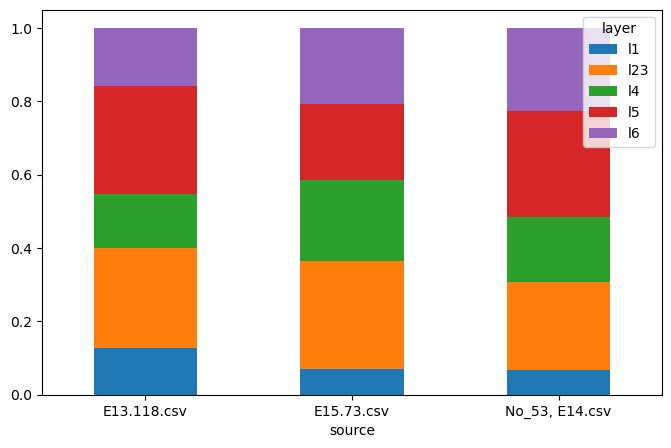

In [13]:
df_pivot = counts.pivot_table(index='source', columns='layer', values='percent', aggfunc='sum')
df_pivot = df_pivot.fillna(0)

colors = cm.tab10.colors

df_pivot.plot(kind='bar', stacked=True, color=colors, figsize=(8, 5))
plt.xticks(rotation=0)

### average percentages

In [14]:
avg_per_layer = counts.groupby('layer')['percent'].mean().reset_index()

print(avg_per_layer)


  layer   percent
0    l1  0.088636
1   l23  0.268885
2    l4  0.182218
3    l5  0.263035
4    l6  0.197225


#### for the simulation I would like to ignore layer 1

In [15]:
avg_per_layer_final = avg_per_layer[avg_per_layer['layer'] != 'l1']

avg_per_layer_final.loc[:, 'percent'] = avg_per_layer_final['percent'] / np.sum(avg_per_layer_final['percent'])

print(avg_per_layer_final)

avg_per_layer_final.to_csv('layers_percent.csv', index=False)

  layer   percent
1   l23  0.295036
2    l4  0.199940
3    l5  0.288617
4    l6  0.216406


## extras

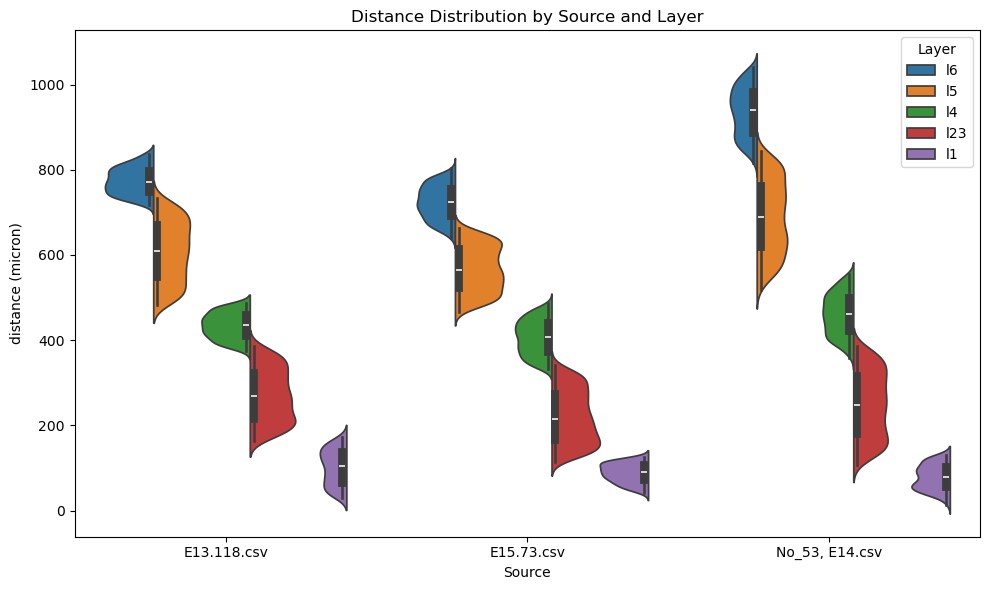

In [16]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=cortex_df,
    x='source',        # x-axis: categorical sources
    y='dist',          # y-axis: distribution values
    hue='layer',       # color: layers
    split=True,        # optionally, split violins by hue
    palette='tab10'    # or use cm.tab10.colors if you're using matplotlib colormaps
)
plt.title('Distance Distribution by Source and Layer')
plt.ylabel('distance (micron)')
plt.xlabel('Source')
plt.legend(title='Layer')
plt.tight_layout()
plt.show()

<Axes: xlabel='dist', ylabel='surface'>

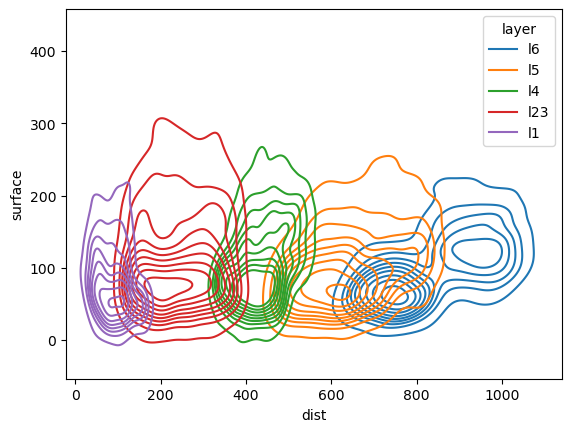

In [17]:
sns.kdeplot(data=cortex_df, x='dist', y='surface', hue='layer')